# 10. 일반 선형 모델 및 최소제곱법

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import null_space

import sympy as sym

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14})

<br>

## 10.01. 일반 선형 모델
- 통계 모델은 예측변수(독립변수, independent variable)를 관측값(종속변수, dependent variable)과 연관시키는 방정식의 집합

<br>

### 일반 선형 모델 (General Linear Model)

| $선형대수학$ | $통계$ | $설명$ |
| - | - | - |
| $Ax = b$ | $X\beta=y$  | 일반 선형 모델 (GLM) |
| $A$ | $X$| 설계 행렬 (열 = 독립변수, 예측변수, 회귀변수) |
| $x$ | $\beta$| 회귀 계수 또는 베타 매개변수 |
| $b$ | $y$ | 종속변수, 결과 측정값, 데이터 |

<br>

### 일반 선형 모델 구축
1. 독립변수와 정속변수를 연관시킨 방정식 정의
- $\epsilon$ : 오차 항(잔차, residual), 모델이 설명하지 못하는 요인을 설명
* $\beta_0$ : 절편 (상수, constant)

$$y = \beta_0 + \beta_1 w + \beta_2 h + \epsilon$$

$$\downarrow$$


$$X\beta = y$$

2. 관찰된 데이터를 방정식에 대입



3. 일련의 방정식을 행렬 방정식으로 변환
4. 방정식 계산


<br>

## 10.02. GLM 풀이
- **최소제곱법**

$$X\beta = y$$

$$(X^T X)^{-1}X^TX\beta = (X^T X)^{-1} X^T y$$

$$\beta = (X^T X)^{-1}X^T y$$

- **위 방정식은 $y$가 설계 행렬 $X$의 열공간에 있을 때에 만 (모델이 데이터가 가진 분산의 100%를 정확히 설명) 정확히 풀 수 있음**
    
    **$\rightarrow$ 따라서, 모델 예측 데이터와 관측 데이터 간의 불일치를 허용하도록 수정**

$$X\beta = y + \epsilon = \hat{y}$$

$$X \beta - \epsilon = y$$

$$\epsilon = X \beta - y$$

<br>

### 최소제곱법의 기하학적 관점
- 설계 행렬의 열공간인 $C(X)$가 $\mathbb{R}^M$의 부분공간이라고 가정할 때,

    **통계 모델에는 독립변수(열)보다 관측값(행)보다 더 많기 때문에, 일반적으로 매우 저차원의 부분공간** $(N < M)$
    
    **종속변수는 벡터 $y \in \mathbb{R}^M$이며, 벡터 $y$는 설계 행렬의 열공간에 있지 않음**
    
    $\rightarrow$ **데이터 벡터 $y$와의 거리를 최소화 하는 $X$의 열에 가중치를 부여하는 계수 $\beta$의 집합을 찾는 것**

    $\rightarrow$ **직교 투영법 사용**
    
    $\rightarrow$ **데이터 $X$와 $y$사이의 최단거리는 투영 벡터 $\epsilon$이며, $X$는 $\epsilon$과 직교**
    
    $$X^T \epsilon = 0$$
    
    $$X^T (y-X\beta) = 0$$
    
    $$X^T y-X^T X\beta = 0$$
    
    $$X^T X \beta = X^T y$$
    
    $$\beta = (X^T X)^{-1} X^T y$$

#### 또한 잔차는 예측 데이터와 직교 $\epsilon^T \hat{y} = 0$

In [32]:
res = happiness-pred_happiness

내적: -1.3642420526593924e-11
상관관계: -4.6202552280823255e-18
 


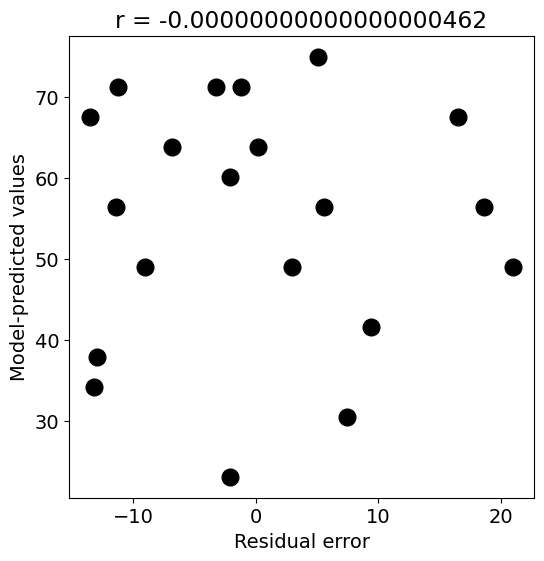

In [34]:
print('내적: ' + str(np.dot(pred_happiness,res)) )
print('상관관계: ' + str(np.corrcoef(pred_happiness,res)[0,1]))
print(' ')


# show in a plot
plt.figure(figsize=(6,6))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.show()

<br>

### 최소제곱법의 작동 원리
- 예측된 데이터와 관측된 데이터 간의 제곱 오차를 최소화
- 예측된 $i$ 번째 데이터 점마다 오차 항이 존재

    $$\epsilon_i = X_i \beta - y_i$$

    모든 오차를 하나의 벡터에 담아
    
    $$\epsilon = X\beta - y$$
    
- 모델이 데이터에 잘 적합하면 오차가 감소, 따라서 모델 적합의 목적은 $\epsilon$의 원소를 최소화하는 $\beta$의 원소를 선택

    즉, 오차 $\epsilon$의 제곱 노름을 최소화
    
    $$||\epsilon||^2 = ||X\beta - y||^2$$
    
    오차의 제곱을 최소화 하는 계수 집합은, 최적화 문제를 통하여 탐색
    
    $${min \\ \;\;\beta} {{} \\ || X\beta - y||^2}$$

- 최적화의 해는 목적 함수의 미분을 0으로 설정하고 계산

$$0 = \frac{d}{d\beta} ||X\beta-y||^2 = 2X^T (X\beta -y)$$

$$0 = X^T X \beta - X^T y$$

$$X^T X \beta = X^T y$$

$$\beta = (X^T X)^{-1} X^T y$$

<br>

#### 최소제곱법에 대한 시각적 직관

In [18]:
x = [ 1,2,3,4,5 ]
y = [ 0,3,2,5,5 ]

In [19]:
X = np.hstack((np.ones((5,1)),np.array(x,ndmin=2).T))
yHat = X @ np.linalg.inv(X.T@X) @ X.T @ y

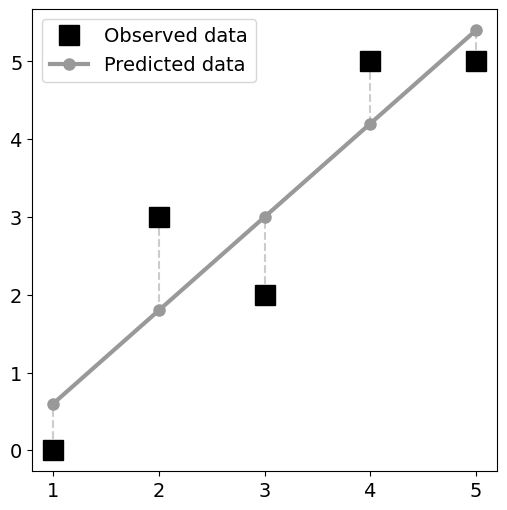

In [20]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'ks',markersize=15,label='Observed data')
plt.plot(x,yHat,'o-',color=[.6,.6,.6],linewidth=3,markersize=8,label='Predicted data')

for n,y,yHat in zip(x,y,yHat):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.legend()
plt.show()

<br>

## 10.03. GLM의 간단한 예

<br>

#### 절편을 고려하지 않은 예시
- 임의의 데이터

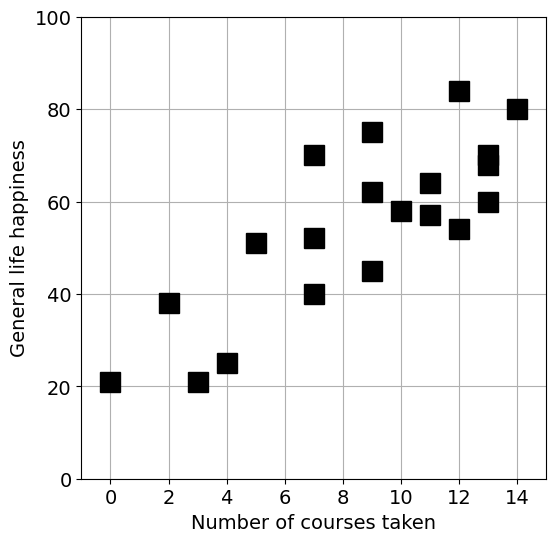

In [21]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.grid()
plt.xticks(range(0,15,2))
plt.show()

- 설계 행렬 생성
    - **절편을 고려하지 않음**
    
$$\begin{bmatrix} X_1\\X_2\\ \vdots \end{bmatrix} \begin{bmatrix} \beta \end{bmatrix} = \begin{bmatrix} Y_1\\Y_2\\ \vdots \end{bmatrix}$$

In [25]:
X = np.array(numcourses,ndmin=2).T
print(X.shape)
X

(20, 1)


array([[13],
       [ 4],
       [12],
       [ 3],
       [14],
       [13],
       [12],
       [ 9],
       [11],
       [ 7],
       [13],
       [11],
       [ 9],
       [ 2],
       [ 5],
       [ 7],
       [10],
       [ 0],
       [ 9],
       [ 7]])

- [$\beta$] 계산
    - $\beta=5.95$

In [26]:
X_leftinv = np.linalg.inv(X.T@X) @ X.T

beta = X_leftinv @ happiness
beta

array([5.92402926])

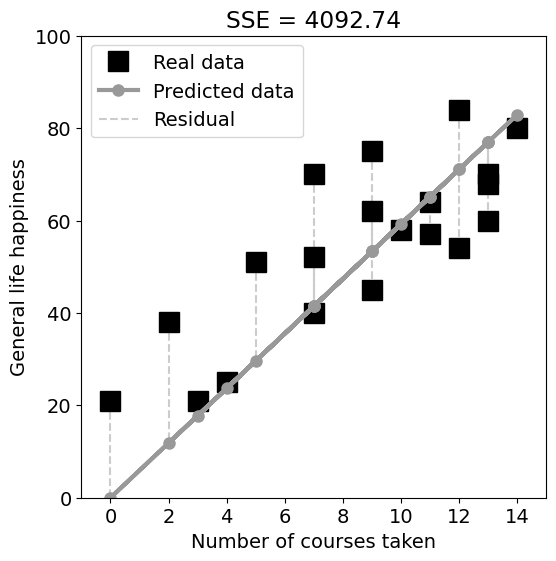

In [27]:
pred_happiness = X@beta

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.show()

<br>

#### 절편을 고려한 예시

- 설계 행렬 생성
    - **절편을 고려**
    
$$\begin{bmatrix} 1&X_1\\1&X_2\\ \vdots&\vdots \end{bmatrix} \begin{bmatrix} \beta_0\\\beta_1 \end{bmatrix} = \begin{bmatrix} Y_1\\Y_2\\ \vdots \end{bmatrix}$$

In [30]:
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
print(X.shape)
X

(20, 2)


array([[ 1., 13.],
       [ 1.,  4.],
       [ 1., 12.],
       [ 1.,  3.],
       [ 1., 14.],
       [ 1., 13.],
       [ 1., 12.],
       [ 1.,  9.],
       [ 1., 11.],
       [ 1.,  7.],
       [ 1., 13.],
       [ 1., 11.],
       [ 1.,  9.],
       [ 1.,  2.],
       [ 1.,  5.],
       [ 1.,  7.],
       [ 1., 10.],
       [ 1.,  0.],
       [ 1.,  9.],
       [ 1.,  7.]])

- $\beta_0=23.13$, $\beta_1 = 3.6982$

In [29]:
X_leftinv = np.linalg.inv(X.T@X) @ X.T

beta = X_leftinv @ happiness
beta

array([23.13033815,  3.69820606])

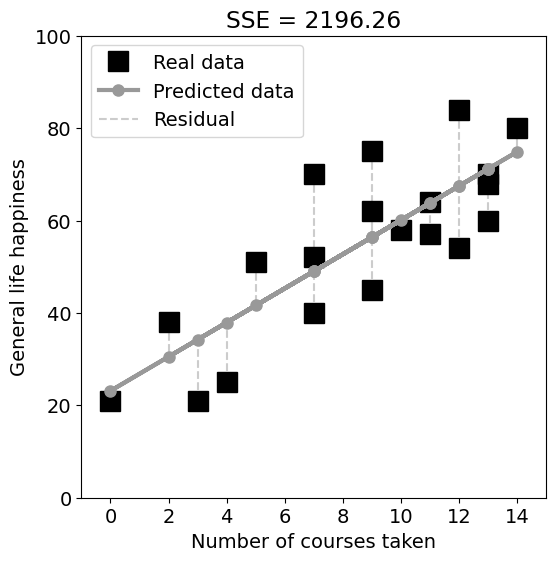

In [31]:
pred_happiness = X@beta

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.show()

<br>

## 10.04. QR 분해를 통한 최소제곱법
- 조건수가 높은 행렬은 수치적으로 불안정해질 수 있음 

    따라서, 설계 행렬의 조건수가 높으면 제곱할 때 수치적으로 더욱더 불안정 해짐
    
<br>

- QR 분해는 최소제곱 문제를 더 안정적으로 풀 수있는 방법을 제공

$$X\beta = y$$

$$QR \beta = y$$

$$R \beta = Q^T y$$

$$\beta = R^{-1} Q^T y$$

- QR 분해는 $X^T X$를 제곱하지 않고 또 명시적으로 행렬의 역을 계산하지 않고도 최소 제곱 문제를 해결한다는 장점이 존재

<br>

#### QR 분해를 통한 최소제곱법 예시
1. $(X^TX)^{-1} X^T y$

In [38]:
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta1 = np.linalg.inv(X.T@X) @ X.T @ happiness

2. $R^{-1}Q^T y$


In [39]:
Q,R = np.linalg.qr(X)

In [40]:
beta2 = np.linalg.inv(R) @ (Q.T@happiness)

In [42]:
print('역을 통한 최소제곱법: ')
print(np.round(beta1,3)), print(' ')

print('QR분해 최소제곱법: ')
print(np.round(beta2,3))

역을 통한 최소제곱법: 
[23.13   3.698]
 
QR분해 최소제곱법: 
[23.13   3.698]
